# Ukraine Russia War Twitter Sentiment Analysis using Python

    
    

## TEAM MATES
* Huaiyu Du 317102
* Edgar Karapetyan 317295
* Cairong Yang 317203
* Hilal Saim 317380

# Introduction
Social Media has become one of the biggest platforms for information sharing,individuals’ opinions and political comments. 
Using this data we can do variouskinds of analysis on different topics. One of such platforms is Twitter. 
With the help of Twitter API - Tweepy, we can collect user tweets on the current conflictbetween Russia and Ukraine.
The Russian-Ukrainian conflict escalated when Russia invaded Ukraine inFebruary 2022. 
Since then people all around the world started actively sharingtheir opinions on social media, 
which gives us an opportunity to make sentimentand emotion analysis.

## The detailed flow of this project is mentioned below - 
    1. Data Scrapping from Twitter
    2. Data Concatenation
    3. Exploratory Data Analysis and Data Cleaning
    4. Data Visualisation
    5. Result

# Dataset Informatiom

We created a dataset for 5 different keywords from scratch. 
We use the Twitter Streaming API to collect data in realtime. We use a list of keywords associated
with the crisis, as shown in Table; Number of tweets containing the Kewywords.



| Keyword | Tweets | 
| --- | --- | 
| UkraineRussiaWar | 57000 |
| Putin | 57000 |
| Russia | 61500 |
| Ukraine | 61500 |
| Zelensky | 60000 |
| Total | 297000 |

# 1. Data Scrapping from Twitter

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [2]:
!pip install pycountry
!pip install wordcloud

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
!pip install langdetect

In [4]:
# Authentication
consumerKey = "hJmggDw6NDQHKwG8jPyOXYOTF"
consumerSecret = "Cbenb7TZ1roUgOMQJXZyEAfa6uSCexZCs11OQK6SudHzi85Nlr"
accessToken = "1119118220-d8eImP8yfDiC14wUydvDKS8uff9YjM2k28by0wl"
accessTokenSecret = "fxz6DqN2RQorPtVFsKcAFST22ICbZ2IC0z8j6zJFwG5aX"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Sentiment Analysis

keyword = "ukrainewar";
noOfTweet = 100
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
tweet_list = []

for tweet in tweets:    
    #print(tweet.text)
    tweet_list.append(tweet.text)

In [6]:
tweet_list

["#Israel Is Arming #Ukraine️ 's Blatantly Neo-Nazi Militia #AzovBattalion\nBlumenthal makes some points-18… https://t.co/zwztDgUX97",
 'Russian Army Entertainment in Non-Controlled Alchevsk (Luhansk Region)\n\nExpecting another downed "bird" somewhere n… https://t.co/l4yS1bAdVE',
 'RT @KYTKYTKYTKYTKYT: O στρατός της #Ουκρανια  συνεχίζει να σκοτώνει στο Ντονενσκ!Άλλη μια γυναίκα νεκρή σήμερα από βομβαρδισμό.Ελπίζουμε να…',
 '#UkraineWar Les autorités de Crimée ont signalé que les régions de #Kherson et de #Zaporozhye sont passées aux comm… https://t.co/Vh9z9qB5Mg',
 "Pyrrhic Victory in Donbas: Winning the Battle, Losing the War - Russia's army could COLLAPSE amid huge losses. Over… https://t.co/5iLOjsy9cP",
 "If you're getting mad, you're getting played. Beware the Russian #Propaganda \n\nhttps://t.co/VFKq7JZSjq \n\nRunning Up… https://t.co/hRpmZ3QTpJ",
 "RT @OlgaSaavedraV: Let's see how fast we can close this gap...\n\n@slaven_vujic and his team have been doing such incredible work he

In [8]:
#Create CSV Files for dataset
import pandas as pd

df = pd.DataFrame(tweet_list)
df.to_csv('output.csv', mode='a', header=False)

# 2. Data Concatenation
## 1. Data file contains tweets with #UkraineRussiaWar

In [18]:
tweet_dataset1 = pd.read_csv('UkraineRussiaWar.csv')
tweet_dataset1

,0
0,@FG7284 @PelmeniPusha Russia is going to win. ...
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1...
2,@NelsonforWI Maybe Ron should get back to Russ...
3,"RT @IikkaKorhonen: April exports to Russia, y-..."
4,RT @nypost: FBI agent mocked Trump-Russia tale...
...,...
40468,@DefenceU NATO never won in days. Ukraine is t...
40469,RT @AP: Workers digging through rubble found 2...
40470,RT @ChrisO_wiki: Russia certainly wouldn't be ...
40471,RT @KyivIndependent: ⚡️EU suspends import duti...


## 2. Data file contains tweets with #Putin

In [19]:
tweet_dataset2 = pd.read_csv ('Putin.csv')
tweet_dataset2

,0
0,RT @TimothyDSnyder: It is senseless to shelter...
1,"@chaplinez70 Murderous Putin, over to you"
2,RT @EmbassyofRussia: 🇷🇺President #Putin on US ...
3,RT @AnonOpsSE: Putin's propagandist Vladimir S...
4,RT @co_co_no5: @OnlinePalEng I think these Isr...
...,...
38969,RT @OccupyDemocrats: BREAKING: Father of ex-US...
38970,RT @RealCandaceO: If you think Putin is a grea...
38971,"RT @anneapplebaum: Putin does not need an ""off..."
38972,RT @psalm7115: @DiegoDarwin2021 @NoLieWithBTC ...


# 3. Data file contains tweets with #Russia

In [22]:
tweet_dataset3 = pd.read_csv ('Russia.csv')
tweet_dataset3

,0
0,@FG7284 @PelmeniPusha Russia is going to win. ...
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1...
2,@NelsonforWI Maybe Ron should get back to Russ...
3,"RT @IikkaKorhonen: April exports to Russia, y-..."
4,RT @nypost: FBI agent mocked Trump-Russia tale...
...,...
43466,RT @KyivIndependent: ⚡️BBC Russia: Retired Rus...
43467,RT @andreapitzer: A friend in Russia is now pa...
43468,RT @olgatokariuk: Day 90 of Ukraine resistance...
43469,RT @lesiavasylenko: Poland 🇵🇱 to complete wall...


## 4. Data file contains tweets with #Ukraine

In [24]:
tweet_dataset4 = pd.read_csv ('Ukraine.csv')
tweet_dataset4

,0
0,@FG7284 @PelmeniPusha Russia is going to win. ...
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1...
2,@NelsonforWI Maybe Ron should get back to Russ...
3,"RT @IikkaKorhonen: April exports to Russia, y-..."
4,RT @nypost: FBI agent mocked Trump-Russia tale...
...,...
44965,RT @NATOSource: Gen. Christopher Cavoli is flu...
44966,RT @HannaLiubakova: I think I am blind. Becaus...
44967,"RT @Tsihanouskaya: No free Belarus, safe Europ..."
44968,@KeillerDon @KeillerDon “The Great Reset” of ...


# 5. Data file contains tweets with #Zelensky

In [26]:
tweet_dataset5 = pd.read_csv ('Zelensky.csv')
tweet_dataset5

,0
0,RT @KyivIndependent: According to President Vo...
1,"RT @RWApodcast: Zelensky: ""The evacuation miss..."
2,"RT @TrumpFix: Levi, [5/17/2022 2:29 PM]\n[ Pho..."
3,RT @Levi_godman: Broooooo….. not even cocaine ...
4,RT @KyivIndependent: ⚡️Zelensky discusses Azov...
...,...
41967,RT @JamesBradleyCA: Add @DanCrenshawTX to the ...
41968,Depp should move in with Zelensky so their cyc...
41969,Zelensky discussed with European Council Presi...
41970,RT @WizWackaTroll: @LincolnsBible Henry Kissin...


### Here, we collated all the files in single file

In [27]:
Tweets_Final = pd.concat([tweet_dataset1,tweet_dataset2,tweet_dataset3,tweet_dataset4,tweet_dataset5])
Tweets_Final

,0
0,@FG7284 @PelmeniPusha Russia is going to win. ...
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1...
2,@NelsonforWI Maybe Ron should get back to Russ...
3,"RT @IikkaKorhonen: April exports to Russia, y-..."
4,RT @nypost: FBI agent mocked Trump-Russia tale...
...,...
41967,RT @JamesBradleyCA: Add @DanCrenshawTX to the ...
41968,Depp should move in with Zelensky so their cyc...
41969,Zelensky discussed with European Council Presi...
41970,RT @WizWackaTroll: @LincolnsBible Henry Kissin...


In [10]:
Tweets_Final.shape

(153986, 41)

In [28]:
# dropping first column
Tweets_Final.reset_index(drop=True)

,0
0,@FG7284 @PelmeniPusha Russia is going to win. ...
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1...
2,@NelsonforWI Maybe Ron should get back to Russ...
3,"RT @IikkaKorhonen: April exports to Russia, y-..."
4,RT @nypost: FBI agent mocked Trump-Russia tale...
...,...
209855,RT @JamesBradleyCA: Add @DanCrenshawTX to the ...
209856,Depp should move in with Zelensky so their cyc...
209857,Zelensky discussed with European Council Presi...
209858,RT @WizWackaTroll: @LincolnsBible Henry Kissin...


### Exporting data in CSV File from dataframe:

In [29]:
Tweets_Final.head()
Tweets_Final.to_csv('Tweets_Concat.csv')

In [30]:
Tweets_Final.columns = ['Text']
Tweets_Final.head()

,Text
0,@FG7284 @PelmeniPusha Russia is going to win. ...
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1...
2,@NelsonforWI Maybe Ron should get back to Russ...
3,"RT @IikkaKorhonen: April exports to Russia, y-..."
4,RT @nypost: FBI agent mocked Trump-Russia tale...


In [31]:
Tweets_Final.shape

(209860, 1)

## Data Concatenation for For each keyword

In [ ]:
import os
import glob
import pandas as pd
os.chdir("Zelensky")

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
all_filenames

In [ ]:
## Take only the second column
## VALID
combined_csv = pd.concat((pd.read_csv(f).iloc[:, 1] for f in all_filenames), ignore_index=True)
combined_csv

In [ ]:
#export to csv
combined_csv.to_csv( "Zelensky.csv", index=False)

# Data Preprocessing

### **Interpretation:**
* The Tweets that we scrapped from Twitter had URLs and Youtube links. To remove those links, we have defined the following function with the help of 'Regex'.
* Further, we have added the URL free text in the new column - "Text_Clear".

In [32]:
def remove_URL(Tweets_Final):
    """Remove URLs from a sample string"""
    return re.sub(r'https?://\S+', '', Tweets_Final)

In [33]:
Tweets_Final['Text_Clear'] = Tweets_Final['Text'].apply(lambda row: remove_URL(row))

In [34]:
Tweets_Final

,Text,Text_Clear
0,@FG7284 @PelmeniPusha Russia is going to win. ...,@FG7284 @PelmeniPusha Russia is going to win. ...
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1...,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1...
2,@NelsonforWI Maybe Ron should get back to Russ...,@NelsonforWI Maybe Ron should get back to Russ...
3,"RT @IikkaKorhonen: April exports to Russia, y-...","RT @IikkaKorhonen: April exports to Russia, y-..."
4,RT @nypost: FBI agent mocked Trump-Russia tale...,RT @nypost: FBI agent mocked Trump-Russia tale...
...,...,...
41967,RT @JamesBradleyCA: Add @DanCrenshawTX to the ...,RT @JamesBradleyCA: Add @DanCrenshawTX to the ...
41968,Depp should move in with Zelensky so their cyc...,Depp should move in with Zelensky so their cyc...
41969,Zelensky discussed with European Council Presi...,Zelensky discussed with European Council Presi...
41970,RT @WizWackaTroll: @LincolnsBible Henry Kissin...,RT @WizWackaTroll: @LincolnsBible Henry Kissin...


### Pre-processing text data
Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:

* Remove punctuation
* Tokenization
* Remove stopwords
* Lemmatize/Stem

In [35]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
Tweets_Final.head()

,Text,Text_Clear
0,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...
2,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.
3,"RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...","RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ..."
4,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish' https://t.co...,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish'


### Remove punctuation

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

Tweets_Final['Text_Punc'] = Tweets_Final['Text_Clear'].apply(lambda x: remove_punct(x))

Tweets_Final.head()

,Text,Text_Clear,Text_Punc
0,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,FG7284 PelmeniPusha Russia is going to win Why would they give up
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,517 SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Russi...
2,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,NelsonforWI Maybe Ron should get back to Russia this 4th of July
3,"RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...","RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...",RT IikkaKorhonen April exports to Russia yoy\n\n🇨🇳26\n🇹🇼67\n🇻🇳77\n🇰🇷71\n\nCompared to December 2...
4,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish' https://t.co...,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish',RT nypost FBI agent mocked TrumpRussia tale pushed by Clinton camp as 5150ish


### Tokenization

The process of splitting some string or sentence into a list of words

In [39]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

Tweets_Final['body_text_tokenized'] = Tweets_Final['Text_Punc'].apply(lambda x: tokenize(x.lower()))

Tweets_Final.head()

,Text,Text_Clear,Text_Punc,body_text_tokenized
0,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,FG7284 PelmeniPusha Russia is going to win Why would they give up,"[fg7284, pelmenipusha, russia, is, going, to, win, why, would, they, give, up]"
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,517 SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Russi...,"[517, scal, results, district, semifinals, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0..."
2,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,NelsonforWI Maybe Ron should get back to Russia this 4th of July,"[nelsonforwi, maybe, ron, should, get, back, to, russia, this, 4th, of, july]"
3,"RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...","RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...",RT IikkaKorhonen April exports to Russia yoy\n\n🇨🇳26\n🇹🇼67\n🇻🇳77\n🇰🇷71\n\nCompared to December 2...,"[rt, iikkakorhonen, april, exports, to, russia, yoy, 26, 67, 77, 71, compared, to, december, 202..."
4,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish' https://t.co...,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish',RT nypost FBI agent mocked TrumpRussia tale pushed by Clinton camp as 5150ish,"[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, by, clinton, camp, as, 5150ish, ]"


### Remove stopwords

Commonly used words like “but,” “if,” “the,” etc.

In [40]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [41]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

Tweets_Final['body_text_nostop'] = Tweets_Final['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

Tweets_Final.head()

,Text,Text_Clear,Text_Punc,body_text_tokenized,body_text_nostop
0,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,FG7284 PelmeniPusha Russia is going to win Why would they give up,"[fg7284, pelmenipusha, russia, is, going, to, win, why, would, they, give, up]","[fg7284, pelmenipusha, russia, going, win, would, give]"
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,517 SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Russi...,"[517, scal, results, district, semifinals, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0...","[517, scal, results, district, semifinals, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0..."
2,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,NelsonforWI Maybe Ron should get back to Russia this 4th of July,"[nelsonforwi, maybe, ron, should, get, back, to, russia, this, 4th, of, july]","[nelsonforwi, maybe, ron, get, back, russia, 4th, july]"
3,"RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...","RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...",RT IikkaKorhonen April exports to Russia yoy\n\n🇨🇳26\n🇹🇼67\n🇻🇳77\n🇰🇷71\n\nCompared to December 2...,"[rt, iikkakorhonen, april, exports, to, russia, yoy, 26, 67, 77, 71, compared, to, december, 202...","[rt, iikkakorhonen, april, exports, russia, yoy, 26, 67, 77, 71, compared, december, 2021, expor..."
4,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish' https://t.co...,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish',RT nypost FBI agent mocked TrumpRussia tale pushed by Clinton camp as 5150ish,"[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, by, clinton, camp, as, 5150ish, ]","[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, clinton, camp, 5150ish, ]"


### Data Cleaning: Using a Lemmatizer
Lemmatizing:The process of grouping together the inflected forms of a word so they can be analyzed as a single term

In [45]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [46]:
print(ps.stem('feet'))
print(ps.stem('feeting'))

feet
feet


In [47]:
print(wn.lemmatize('feet'))
print(wn.lemmatize('foot'))

foot
foot


In [48]:
nltk.download("wordnet", "nltk_data/")

[nltk_data] Downloading package wordnet to nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

Tweets_Final['body_text_lemmatized'] = Tweets_Final['body_text_nostop'].apply(lambda x: lemmatizing(x))

Tweets_Final.head(10)

,Text,Text_Clear,Text_Punc,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,FG7284 PelmeniPusha Russia is going to win Why would they give up,"[fg7284, pelmenipusha, russia, is, going, to, win, why, would, they, give, up]","[fg7284, pelmenipusha, russia, going, win, would, give]","[fg7284, pelmenipusha, russia, go, win, would, give]","[fg7284, pelmenipusha, russia, going, win, would, give]"
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,517 SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Russi...,"[517, scal, results, district, semifinals, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0...","[517, scal, results, district, semifinals, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0...","[517, scal, result, district, semifin, 1, 3, fort, lorami, 0, 9, covington, 0, 7, russia, 0, 0, ...","[517, scal, result, district, semifinal, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0, ..."
2,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,NelsonforWI Maybe Ron should get back to Russia this 4th of July,"[nelsonforwi, maybe, ron, should, get, back, to, russia, this, 4th, of, july]","[nelsonforwi, maybe, ron, get, back, russia, 4th, july]","[nelsonforwi, mayb, ron, get, back, russia, 4th, juli]","[nelsonforwi, maybe, ron, get, back, russia, 4th, july]"
3,"RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...","RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...",RT IikkaKorhonen April exports to Russia yoy\n\n🇨🇳26\n🇹🇼67\n🇻🇳77\n🇰🇷71\n\nCompared to December 2...,"[rt, iikkakorhonen, april, exports, to, russia, yoy, 26, 67, 77, 71, compared, to, december, 202...","[rt, iikkakorhonen, april, exports, russia, yoy, 26, 67, 77, 71, compared, december, 2021, expor...","[rt, iikkakorhonen, april, export, russia, yoy, 26, 67, 77, 71, compar, decemb, 2021, export, 50...","[rt, iikkakorhonen, april, export, russia, yoy, 26, 67, 77, 71, compared, december, 2021, export..."
4,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish' https://t.co...,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish',RT nypost FBI agent mocked TrumpRussia tale pushed by Clinton camp as 5150ish,"[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, by, clinton, camp, as, 5150ish, ]","[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, clinton, camp, 5150ish, ]","[rt, nypost, fbi, agent, mock, trumprussia, tale, push, clinton, camp, 5150ish, ]","[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, clinton, camp, 5150ish, ]"
5,"@NaturalGuard @blackintheempir What are violent separatist forces called in Russian, ""terrorist""...","@NaturalGuard @blackintheempir What are violent separatist forces called in Russian, ""terrorist""...",NaturalGuard blackintheempir What are violent separatist forces called in Russian terrorist whic...,"[naturalguard, blackintheempir, what, are, violent, separatist, forces, called, in, russian, ter...","[naturalguard, blackintheempir, violent, separatist, forces, called, russian, terrorist, means, ...","[naturalguard, blackintheempir, violent, separatist, forc, call, russian, terrorist, mean, ukrai...","[naturalguard, blackintheempir, violent, separatist, force, called, russian, terrorist, mean, uk..."
6,"RT @Youblacksoul: This #Ukrainian soldier tells to the camera how some civilians ""lovers of the ...","RT @Youblacksoul: This #Ukrainian soldier tells to the camera how some civilians ""lovers of the ...",RT Youblackso

### Feature Engineering: Feature Creation
The process of creating new features and/or transforming existing features to get the most out of your data

In [50]:
#text message length
Tweets_Final['body_len'] = Tweets_Final['Text'].apply(lambda x: len(x) - x.count(" "))
Tweets_Final.head()

,Text,Text_Clear,Text_Punc,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,body_len
0,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,FG7284 PelmeniPusha Russia is going to win Why would they give up,"[fg7284, pelmenipusha, russia, is, going, to, win, why, would, they, give, up]","[fg7284, pelmenipusha, russia, going, win, would, give]","[fg7284, pelmenipusha, russia, go, win, would, give]","[fg7284, pelmenipusha, russia, going, win, would, give]",58
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,517 SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Russi...,"[517, scal, results, district, semifinals, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0...","[517, scal, results, district, semifinals, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0...","[517, scal, result, district, semifin, 1, 3, fort, lorami, 0, 9, covington, 0, 7, russia, 0, 0, ...","[517, scal, result, district, semifinal, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0, ...",98
2,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,NelsonforWI Maybe Ron should get back to Russia this 4th of July,"[nelsonforwi, maybe, ron, should, get, back, to, russia, this, 4th, of, july]","[nelsonforwi, maybe, ron, get, back, russia, 4th, july]","[nelsonforwi, mayb, ron, get, back, russia, 4th, juli]","[nelsonforwi, maybe, ron, get, back, russia, 4th, july]",55
3,"RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...","RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...",RT IikkaKorhonen April exports to Russia yoy\n\n🇨🇳26\n🇹🇼67\n🇻🇳77\n🇰🇷71\n\nCompared to December 2...,"[rt, iikkakorhonen, april, exports, to, russia, yoy, 26, 67, 77, 71, compared, to, december, 202...","[rt, iikkakorhonen, april, exports, russia, yoy, 26, 67, 77, 71, compared, december, 2021, expor...","[rt, iikkakorhonen, april, export, russia, yoy, 26, 67, 77, 71, compar, decemb, 2021, export, 50...","[rt, iikkakorhonen, april, export, russia, yoy, 26, 67, 77, 71, compared, december, 2021, export...",124
4,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish' https://t.co...,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish',RT nypost FBI agent mocked TrumpRussia tale pushed by Clinton camp as 5150ish,"[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, by, clinton, camp, as, 5150ish, ]","[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, clinton, camp, 5150ish, ]","[rt, nypost, fbi, agent, mock, trumprussia, tale, push, clinton, camp, 5150ish, ]","[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, clinton, camp, 5150ish, ]",117


In [51]:
#feature for % punctuation
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

Tweets_Final['punct%'] = Tweets_Final['Text'].apply(lambda x: count_punct(x))

Tweets_Final.head()

,Text,Text_Clear,Text_Punc,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,body_len,punct%
0,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,@FG7284 @PelmeniPusha Russia is going to win. Why would they give up?,FG7284 PelmeniPusha Russia is going to win Why would they give up,"[fg7284, pelmenipusha, russia, is, going, to, win, why, would, they, give, up]","[fg7284, pelmenipusha, russia, going, win, would, give]","[fg7284, pelmenipusha, russia, go, win, would, give]","[fg7284, pelmenipusha, russia, going, win, would, give]",58,6.9
1,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,5/17 #SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Rus...,517 SCAL 🥎 Results\n\nDistrict Semifinals\n1️⃣3️⃣ Fort Loramie\n0️⃣9️⃣ Covington\n\n0️⃣7️⃣ Russi...,"[517, scal, results, district, semifinals, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0...","[517, scal, results, district, semifinals, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0...","[517, scal, result, district, semifin, 1, 3, fort, lorami, 0, 9, covington, 0, 7, russia, 0, 0, ...","[517, scal, result, district, semifinal, 1, 3, fort, loramie, 0, 9, covington, 0, 7, russia, 0, ...",98,2.0
2,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,@NelsonforWI Maybe Ron should get back to Russia this 4th of July.,NelsonforWI Maybe Ron should get back to Russia this 4th of July,"[nelsonforwi, maybe, ron, should, get, back, to, russia, this, 4th, of, july]","[nelsonforwi, maybe, ron, get, back, russia, 4th, july]","[nelsonforwi, mayb, ron, get, back, russia, 4th, juli]","[nelsonforwi, maybe, ron, get, back, russia, 4th, july]",55,3.6
3,"RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...","RT @IikkaKorhonen: April exports to Russia, y-o-y\n\n🇨🇳-26%\n🇹🇼-67%\n🇻🇳-77%\n🇰🇷-71%\n\nCompared ...",RT IikkaKorhonen April exports to Russia yoy\n\n🇨🇳26\n🇹🇼67\n🇻🇳77\n🇰🇷71\n\nCompared to December 2...,"[rt, iikkakorhonen, april, exports, to, russia, yoy, 26, 67, 77, 71, compared, to, december, 202...","[rt, iikkakorhonen, april, exports, russia, yoy, 26, 67, 77, 71, compared, december, 2021, expor...","[rt, iikkakorhonen, april, export, russia, yoy, 26, 67, 77, 71, compar, decemb, 2021, export, 50...","[rt, iikkakorhonen, april, export, russia, yoy, 26, 67, 77, 71, compared, december, 2021, export...",124,11.3
4,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish' https://t.co...,RT @nypost: FBI agent mocked Trump-Russia tale pushed by Clinton camp as '51-50ish',RT nypost FBI agent mocked TrumpRussia tale pushed by Clinton camp as 5150ish,"[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, by, clinton, camp, as, 5150ish, ]","[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, clinton, camp, 5150ish, ]","[rt, nypost, fbi, agent, mock, trumprussia, tale, push, clinton, camp, 5150ish, ]","[rt, nypost, fbi, agent, mocked, trumprussia, tale, pushed, clinton, camp, 5150ish, ]",117,13.7


In [52]:
Tweets_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209860 entries, 0 to 41971
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Text                  209860 non-null  object 
 1   Text_Clear            209860 non-null  object 
 2   Text_Punc             209860 non-null  object 
 3   body_text_tokenized   209860 non-null  object 
 4   body_text_nostop      209860 non-null  object 
 5   body_text_stemmed     209860 non-null  object 
 6   body_text_lemmatized  209860 non-null  object 
 7   body_len              209860 non-null  int64  
 8   punct%                209860 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 16.0+ MB


## Exploratory Data Analysis

In [53]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [56]:
# extract hashtags from dataset
ht = hashtag_extract(Tweets_Final['Text'])

In [57]:
ht = sum(ht, [])

In [58]:
ht[:5]

['SCAL', 'Ukrainian', 'Russian', 'Kiev', 'Ethiopia']

In [59]:
ht

['SCAL',
 'Ukrainian',
 'Russian',
 'Kiev',
 'Ethiopia',
 'SussmannTrial',
 'Putin',
 'Russian',
 'Russia',
 'IStandWithRussia',
 'Putin',
 'PutinHitler',
 'Zelenskyy',
 'Ukraine',
 'helpUkraine',
 'StandwithUkraine',
 'Russia',
 'war',
 'Ukraine',
 'NATO',
 'Australia',
 'Canva',
 'Kharkiv',
 'GodMorningTuesday',
 'Russia',
 'Ukraine',
 'Georgia',
 'FBI',
 'Ukraine',
 'media',
 'India',
 'India',
 'Ukrainian',
 'Russian',
 'Kiev',
 'AzovstaI',
 'Anonymous',
 'BrittneyGriner',
 'powerofcrisis',
 'NATO',
 'Yavoriv',
 'Poland',
 'JohnnyDeppVsAmberHeardTrial',
 'abortion',
 'Russia',
 'Ukraine',
 'XiJinping',
 'VladimirPutin',
 'China',
 'Russia',
 'FBI',
 'Kharkiv',
 'Russia',
 'Ukraine',
 'Ucrania',
 'Rusia',
 'Russia',
 'Ukraine',
 'Russia',
 'WTO',
 'StopSanctions',
 'Negotiate',
 'Ukraine',
 'Ukraine',
 'Russia',
 'Iran',
 'Venezuela',
 'Biden',
 'FBI',
 'Gazprom',
 'Putin',
 'Mariupol',
 'Ziza',
 'Ukraine',
 'Russia',
 'Crimea',
 'LetMyPeopleGo',
 'S',
 'Ukrainian',
 'Russian',
 'Ki

In [60]:
freq = nltk.FreqDist(ht)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,SCAL,4
1,Ukrainian,870
2,Russian,931
3,Kiev,191
4,Ethiopia,25


In [61]:
import seaborn as sns

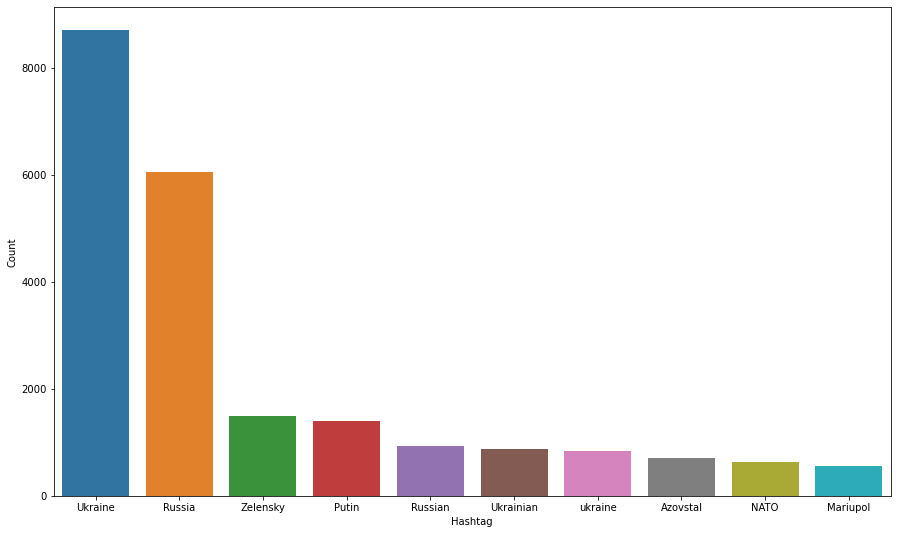

In [62]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

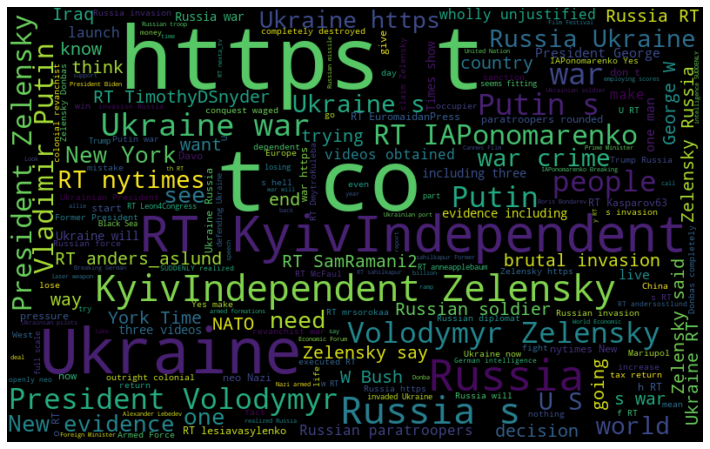

In [67]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in Tweets_Final['Text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

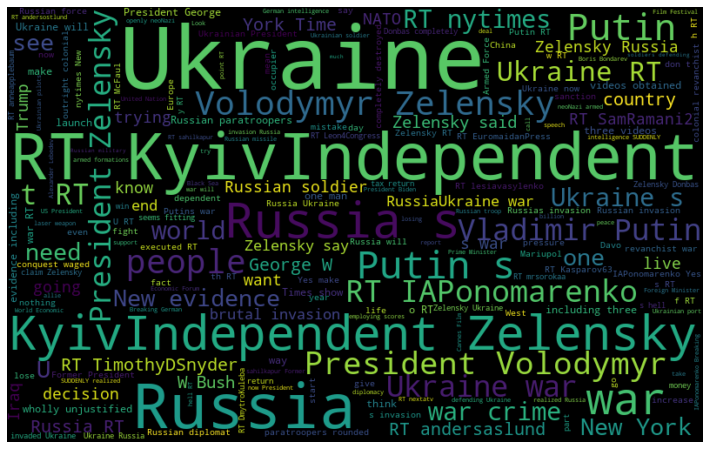

In [66]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in Tweets_Final['Text_Clear']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [69]:
def cleanText(text):
        text=text.lower()
        text = re.sub(r'(?i)RT @\w+: ','', text) # remove RT
        text = re.sub(r'@\w+','', text) # remove @member
        text = re.sub(r'#','', text) # remove # symbol
        text = re.sub(r'https?:\/\/\S+','', text) # remove the hyper link
        text = re.sub(r'[^\w\s]', '', text) # remove punctuations
        return text

In [70]:
Tweets_Final['Text_RT'] = Tweets_Final['Text'].apply(lambda row: cleanText(row))

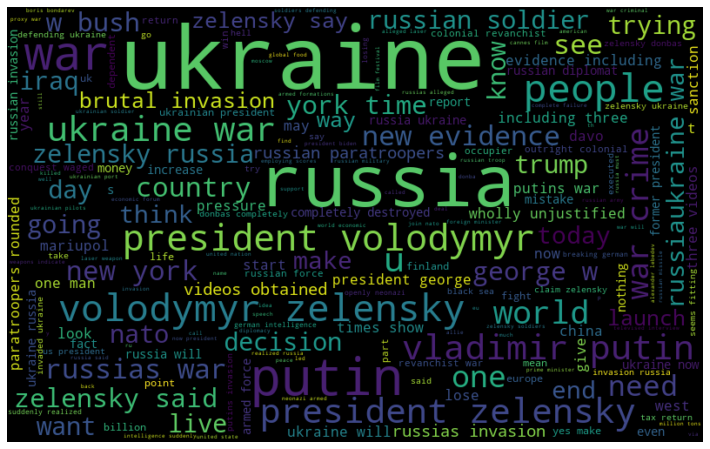

In [71]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in Tweets_Final['Text_RT']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()